<a href="https://colab.research.google.com/github/TochukwuAkubue/CE888/blob/Lab1/lab3/cnn_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE811 Lab 9
December 2020.  Dr Michael Fairbank. 
University of Essex.

## Training a CNN vision Classifier

- Objectives: Learn more about CNN networks
- Co-objective: Learn about standard Keras vision benchmarks datasets - MNIST, CIFAR-10, Mnist-Fashion

### Instructions: 

1. Go through each code block, study and make sure you understand each of them, and fill in the missing "TODO" parts.

2. Work though the "checklist of things to do" in the final block of this page.

Before you start
- Check you have the python packages numpy, matplotlib, tensorflow.
- e.g. install them with "pip3 install numpy, matplotlib, tensorflow"

## Load a vision benchmark dataset

- We will start with the MNIST hand-written numeric digits dataset.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


dataset_name="fashion"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3. 
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset_name=="mnist":
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    sys.exit(0)
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


4423680/4422102 [==============================] - 2s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Visualise the Dataset

- Show pictures of the images we are trying to learn...

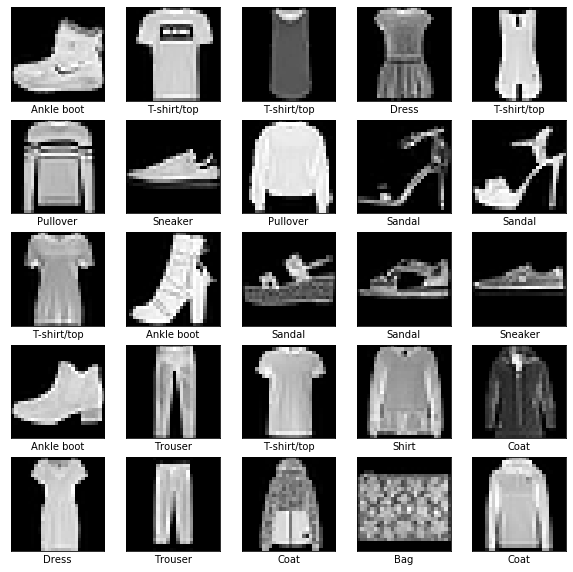

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

## Prep the data
- The keras datasets contain integer pixel intensities from 0 to 255.  We must rescale this to floats from 0 to 1.

In [ ]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1



Reshaped images from  (60000, 28, 28) to (60000, 28, 28, 1) so that 'channel' dimension exists


## Define a model
- This means build our neural network here.
- TODO modify the simple model defined below so that it has the following structure layers.
- Use relu activation functions everywhere, **except for the last layer which must have no activation function** (because the softmax is added in the training loop with the "SparseCategoricalCrossentropy(from_logits=True)" line below).

![image.png](attachment:image.png)


In [ ]:
# build FFNN with CNN architecture
keras_model = keras.Sequential()
keras_model.add(layers.Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
keras_model.add(layers.Conv2D(filters=12, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
keras_model.add(layers.Flatten())
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dense(num_classification_categories, activation=None))

## View Model Summary

- have a look at the model summary here.

- Try to verify that the number of parameters of each layer matches what you calculate it should be.

In [ ]:
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 5)         50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 12)        552       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 588)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               75392     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Train the network

In [ ]:
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 25s 52ms/step - loss: 0.5898 - accuracy: 0.7883 - val_loss: 0.4660 - val_accuracy: 0.8298
Epoch 2/5
469/469 [==============================] - 25s 52ms/step - loss: 0.3913 - accuracy: 0.8605 - val_loss: 0.3884 - val_accuracy: 0.8620
Epoch 3/5
469/469 [==============================] - 25s 53ms/step - loss: 0.3444 - accuracy: 0.8770 - val_loss: 0.3457 - val_accuracy: 0.8762
Epoch 4/5
469/469 [==============================] - 24s 51ms/step - loss: 0.3135 - accuracy: 0.8872 - val_loss: 0.3298 - val_accuracy: 0.8802
Epoch 5/5
469/469 [==============================] - 25s 53ms/step - loss: 0.2949 - accuracy: 0.8932 - val_loss: 0.3391 - val_accuracy: 0.8820


## Plot graphs of learning progress...

- Have a look at these graphs, and try to work out whether any overfitting has occurred, or whether we would gain any benefit for training for more or fewer epochs (TODO)

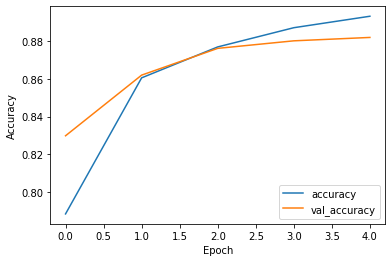

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


## Inspect how well the system is working...
- The test set has a lot of images in it, but we can only view 25 at a time.
- Hence rerun this code block several times, to get a different random set of samples from the test set (TODO)


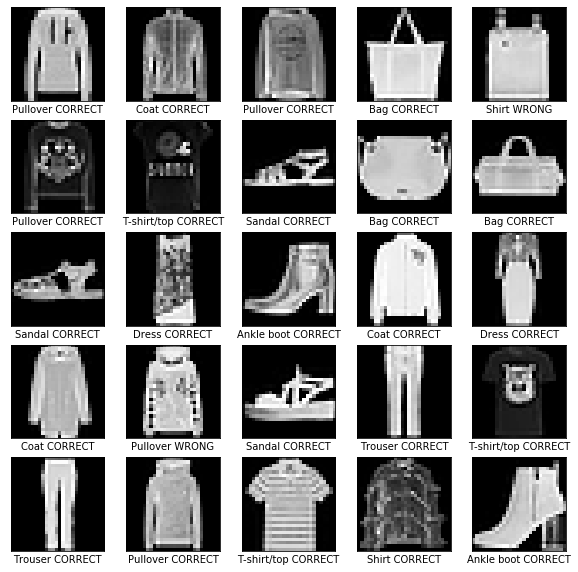

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()

## Checklist of things to do

1. Check you have made 3 different vision classifiers; for Mnist, mnist-fashion and for cifar10.  No need to bother with cifar100. (TODO)

2. Check in each case you have inspected the results, the validation accuracy and decided whether more or fewer epochs would be required. (TODO)

3. If you have time remaining then see if you can improve performance on Cifar10.  Possible methods:  Try training for longer.  Add more convolutional layers.  Add more filters at each convolutional layer.    If you view the CNN structure used here: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ (read the final architecture he used at the bottom of the page) then you can see how to score >80% on CIFAR10.  But it requires a lot of CPU/GPU time to get there.  See the next note on google colab for free GPU usage.

4. Try running your notebook in **google colab**, for free extra GPU speed.  See [video](https://panopto.essex.ac.uk/Panopto/Pages/Viewer.aspx?id=e006900f-1e8c-46c6-85d1-ac8e00f39805) showing how to do that.

5. If time permits, then see what the effect of changing the relu activation functions to tanh.

6. If time permits, then try removing all of the convolutional layers, and just have a fully-connected classifier.  Remember you still need the flatten layers though as these images are each rank3 tensors.
